In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os


# <h1 style='background:#F08080; border:2; border-radius: 10px; font-size:250%; font-weight: bold; color:black'><center>HEART FAILURE PREDICTION</center></h1>

Cardiovascular diseases (CVDs) are responsible for the highest number of global deaths, with approximately 17.9 million lives lost each year, accounting for 31% of all worldwide deaths. This dataset focuses on predicting mortality caused by heart failure, a common occurrence related to CVDs, using 12 distinct features.

Implementing population-wide strategies to address behavioral risk factors like tobacco use, unhealthy diet, obesity, physical inactivity, and excessive alcohol consumption can significantly reduce the incidence of most cardiovascular diseases.

Early detection and management are crucial for individuals with cardiovascular disease or those at high risk due to factors such as hypertension, diabetes, hyperlipidemia, or existing conditions. Utilizing a machine learning model can provide valuable assistance in these cases.

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
    
<h1 style='background:#F08080; border:0; border-radius: 10px; color:black'><center> TABLE OF CONTENTS </center></h1>

### [**1. IMPORTING LIBRARIES**](#title-one)
    
### [**2. LOADING DATA**](#title-two)

### [**3. DATA ANALYSIS**](#title-three)

### [**4. DATA PREPROCESSING**](#title-four)

### [**MODEL BUILDING**](#title-MB)
    
### [**5. SVM**](#title-five)
    
### [**6. ANN**](#title-six)

### [**7. END**](#title-seven)
    
<a id="title-one"></a>
<h1 style='background:#F08080; border:2; border-radius: 10px; color:black'><center>IMPORTING LIBRARIES</center></h1>

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import svm
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

<a id="title-two"></a>
<h1 style='background:#F08080; border:0; border-radius: 10px; color:black'><center>LOADING DATA</center></h1>

Reading data from CSV file and print the first 5 rows

In [3]:
#loading data
data_df = pd.read_csv("data.csv")
data_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


<a id="title-three"></a>
<h1 style='background:#F08080; border:0; border-radius: 10px; color:black'><center>DATA ANALYSIS</center></h1>

Print the information of data frame to checking for any missing values across the dataset

In [4]:

data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### **Note:**
* There are 299 non-null values in all the attributes thus no missing values.
* Datatype is also either 'float64' or 'int64' which works well while feeded to an algorithm.

The code plots a count bar chart (sns.countplot) to evaluate the target variable DEATH_EVENT and visualizes the distribution of its values. The bars are labeled with the respective count using ax.bar_label.






[Text(0, 0, '203'), Text(0, 0, '96')]

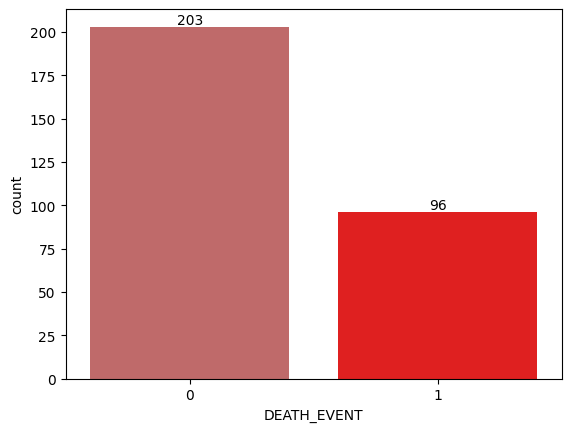

In [5]:
#Evaluating the target and finding out the potential skewness in the data
cols= ["#CD5C5C","#FF0000"]
ax = sns.countplot(x= data_df["DEATH_EVENT"], palette= cols)
ax.bar_label(ax.containers[0])

### **Note:**
* Target labels are 203 versus 96 thus there is an imbalance in the data.

The code computes the descriptive statistics of the dataset data_df using the describe() function and transposes the result (T) to display it in a tabular format. This provides a summary of the statistical measures such as count, mean, standard deviation, minimum, quartiles, and maximum for each column in the dataset.






In [6]:

data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


The code generates a correlation matrix (corrmat) for all the features in the dataset data_df and visualizes it using a heatmap. The heatmap uses a color palette (cmap) to represent the correlation values, with darker colors indicating stronger correlations. Additionally, the heatmap includes annotations to display the correlation values on the plot.






<Axes: >

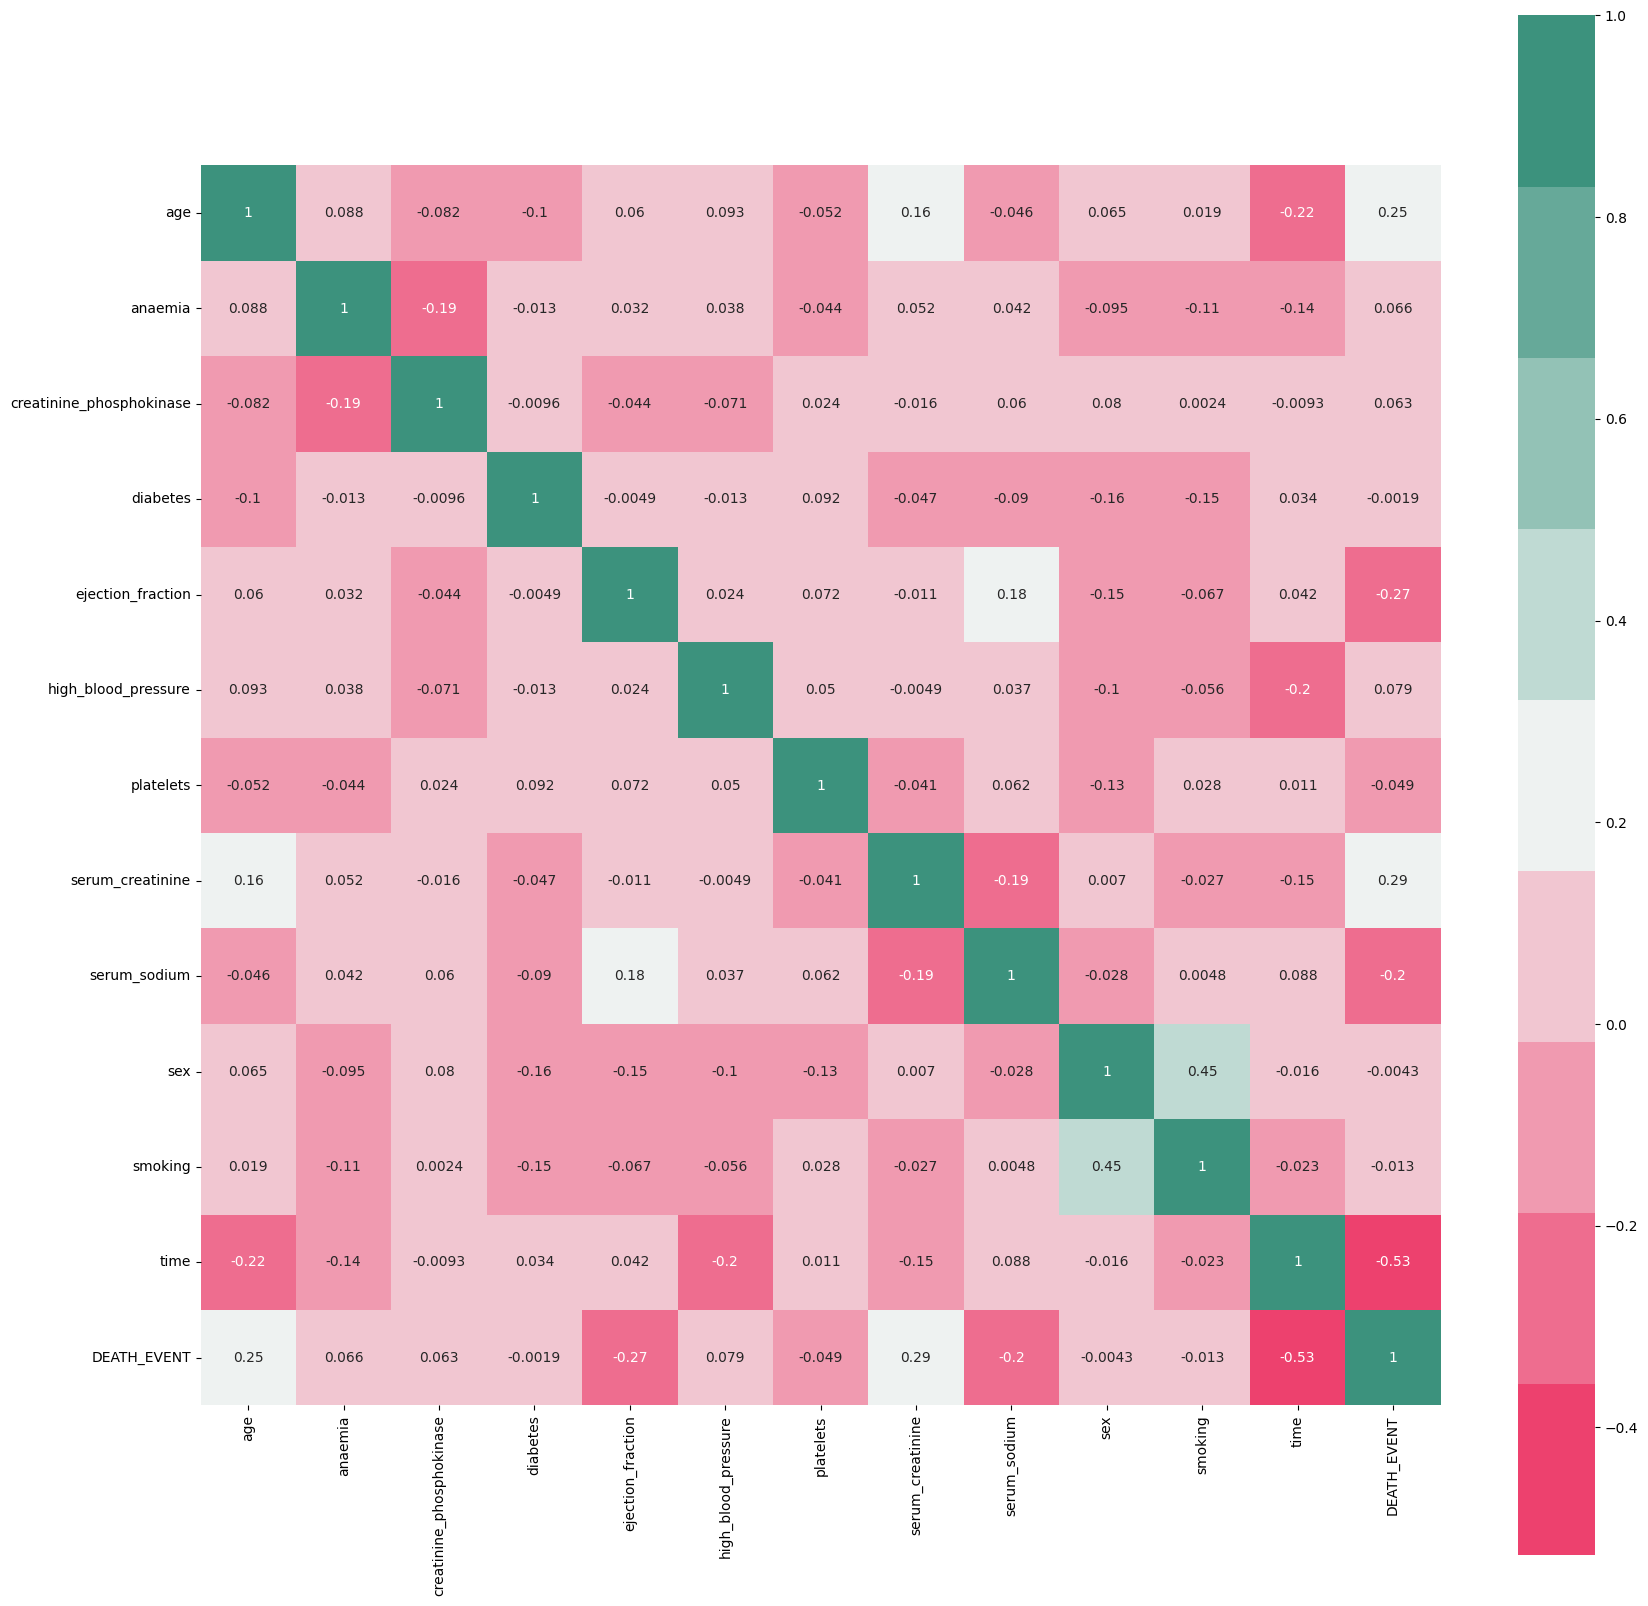

In [7]:
#Doing Bivariate Analysis by examaning a corelation matrix of all the features using heatmap
cmap = sns.diverging_palette(2, 165, s=80, l=55, n=9)
corrmat = data_df.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

The code creates a countplot (Days_of_week) to visualize the distribution of age in the dataset data_df, with the count of occurrences of each age group shown on the y-axis. The countplot is further differentiated by the DEATH_EVENT variable using the hue parameter, and a specific color palette (cols) is used to represent the two categories. The title of the plot is set as "Distribution Of Age" with a specified color.






Text(0.5, 1.0, 'Distribution Of Age')

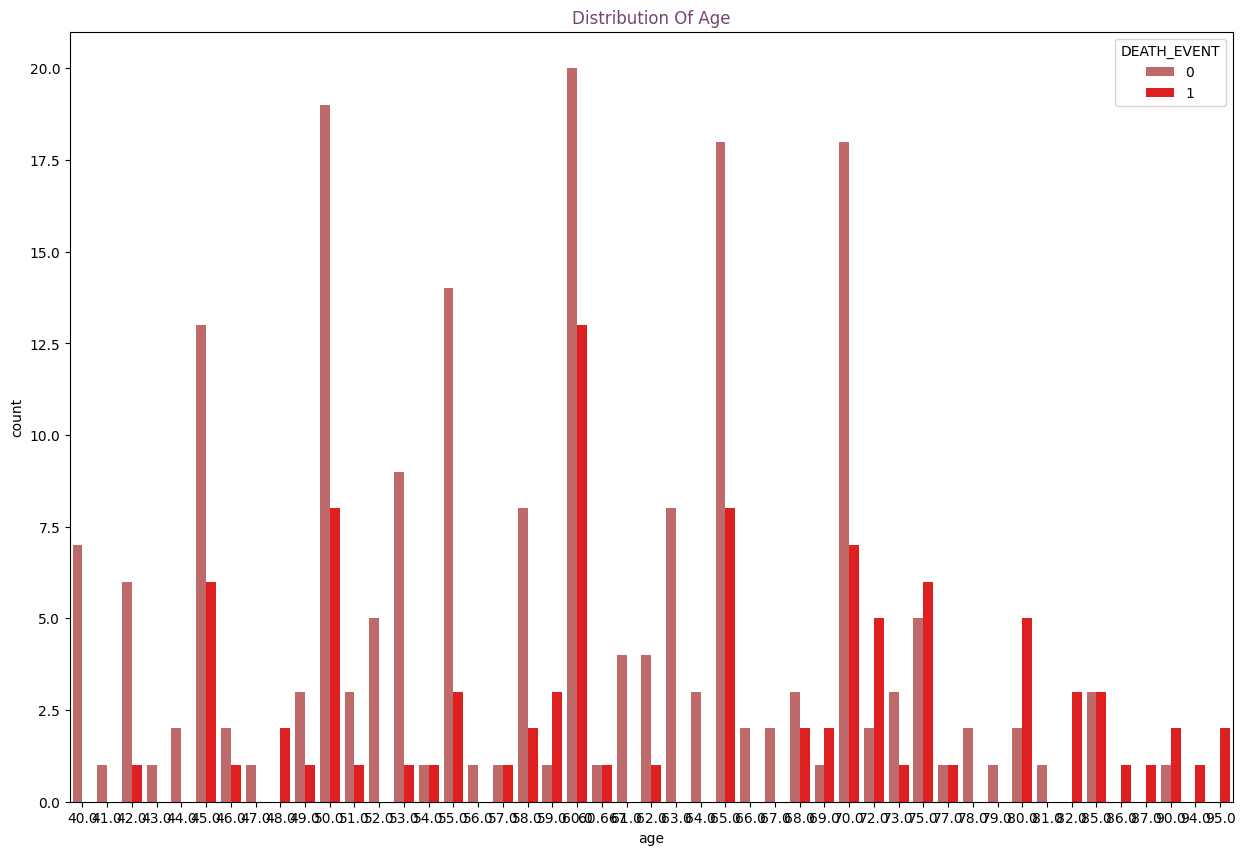

In [8]:
#Evauating age distribution as per the deaths happened
plt.figure(figsize=(15,10))
Days_of_week=sns.countplot(x=data_df['age'],data=data_df, hue ="DEATH_EVENT",palette = cols)
Days_of_week.set_title("Distribution Of Age", color="#774571")

The code loops through a list of non-binary features (feature) and creates individual plots to check for potential outliers. Each plot consists of a swarmplot and a boxenplot. The swarmplot visualizes the distribution of data points for each category of the DEATH_EVENT variable, while the boxenplot displays the quartiles and potential outliers. The plots are shown one by one using plt.show().






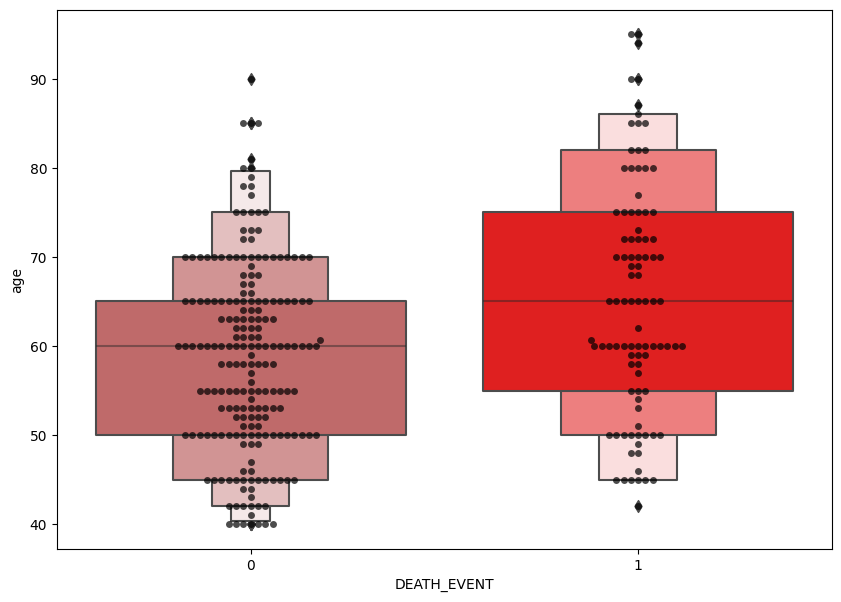

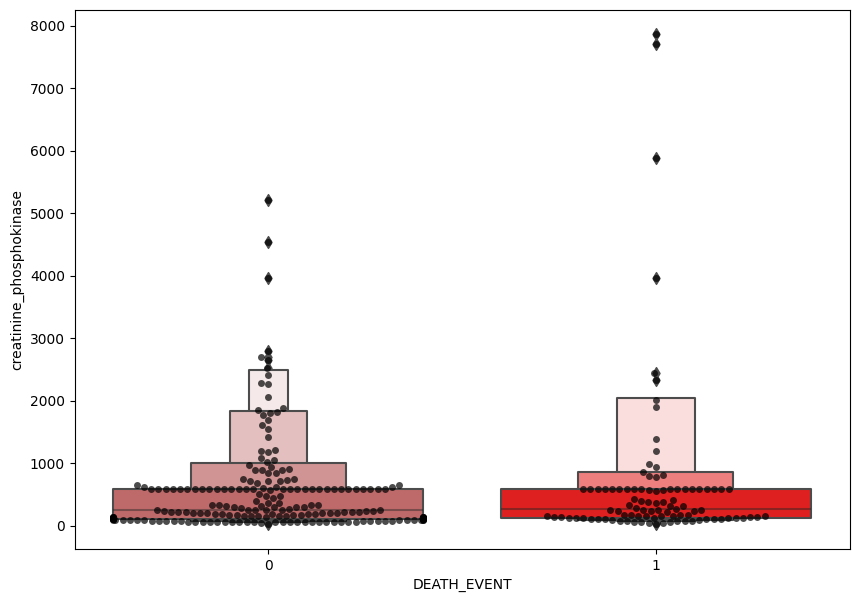

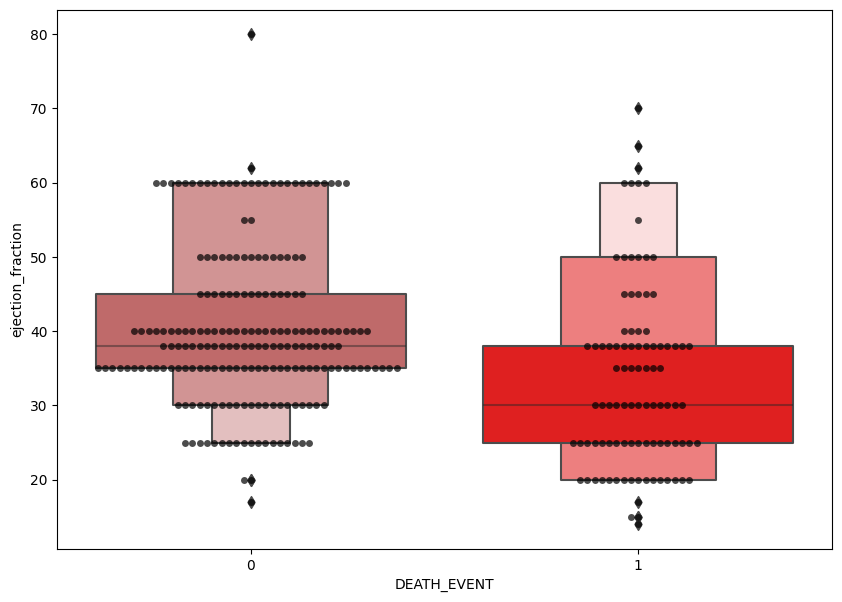

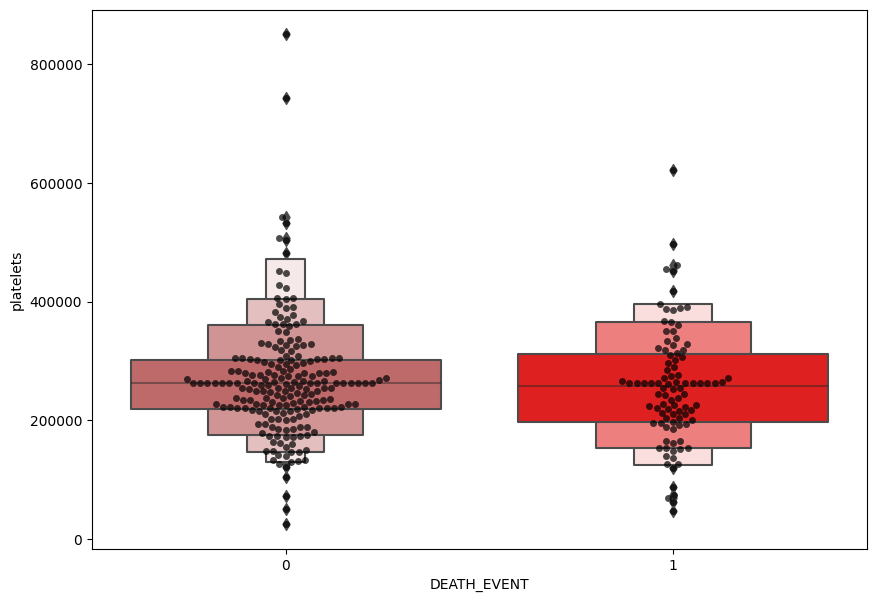

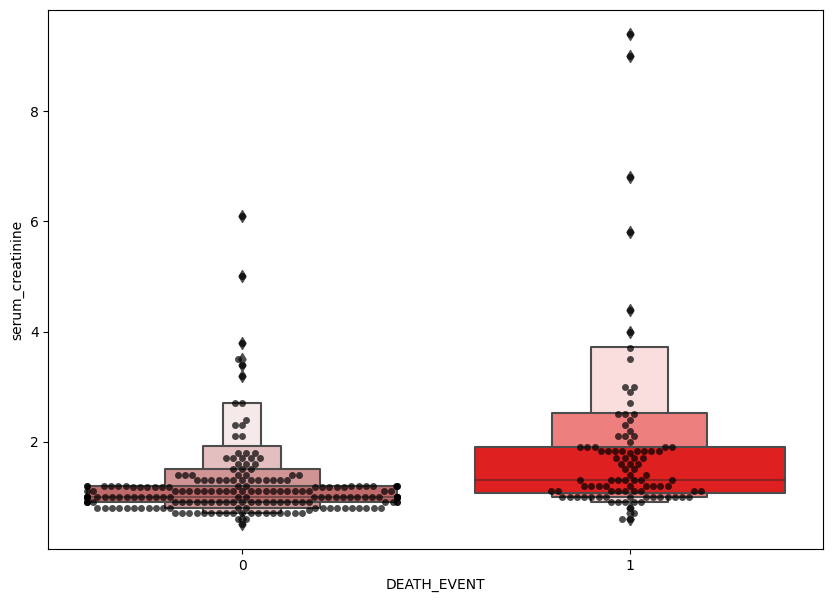

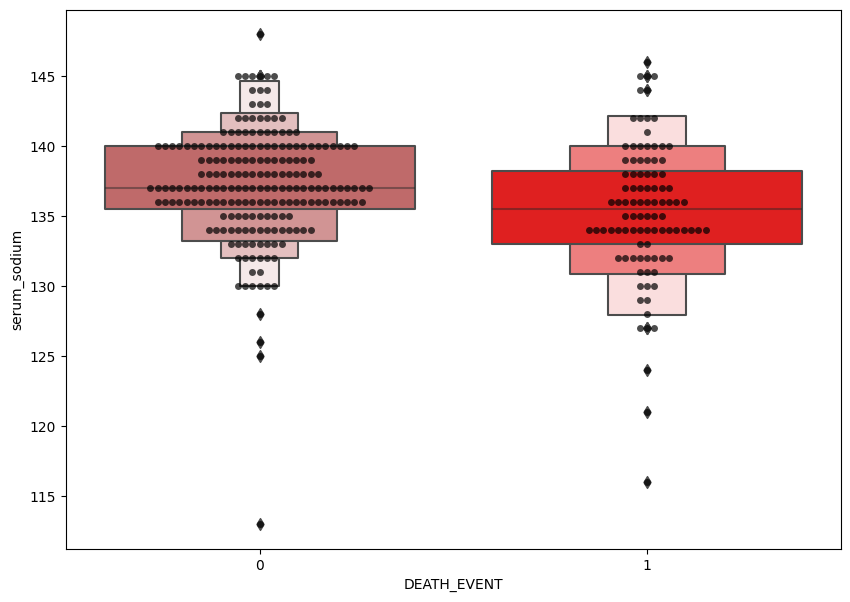

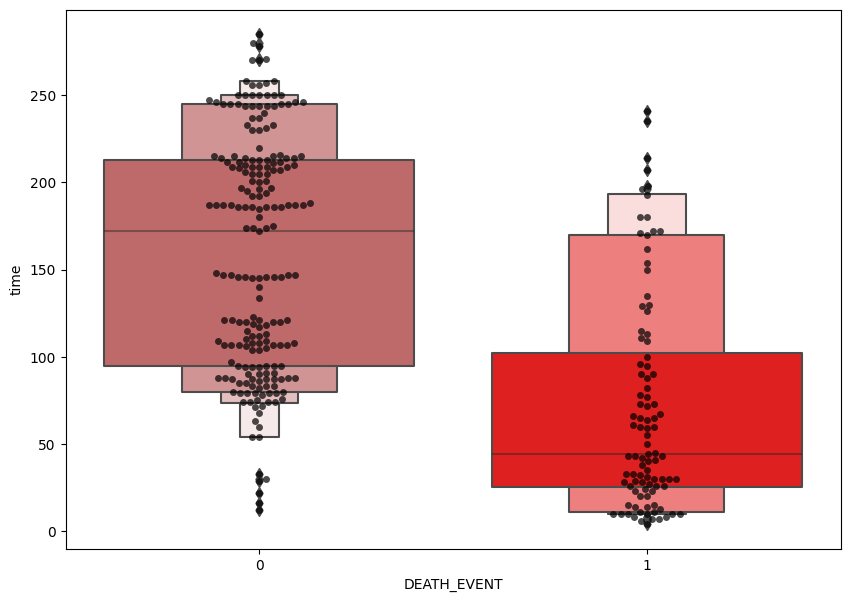

In [9]:
# Checking for potential outliers using the "Boxen and Swarm plots" of non binary features.
feature = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "time"]
for i in feature:
    plt.figure(figsize=(10,7))
    sns.swarmplot(x=data_df["DEATH_EVENT"], y=data_df[i], color="black", alpha=0.7)
    sns.boxenplot(x=data_df["DEATH_EVENT"], y=data_df[i], palette=cols)
    plt.show()

The code creates a KDE (Kernel Density Estimation) plot to visualize the relationship between the "time" and "age" features. The plot is colored based on the "DEATH_EVENT" variable using the specified color palette.






<Axes: xlabel='time', ylabel='age'>

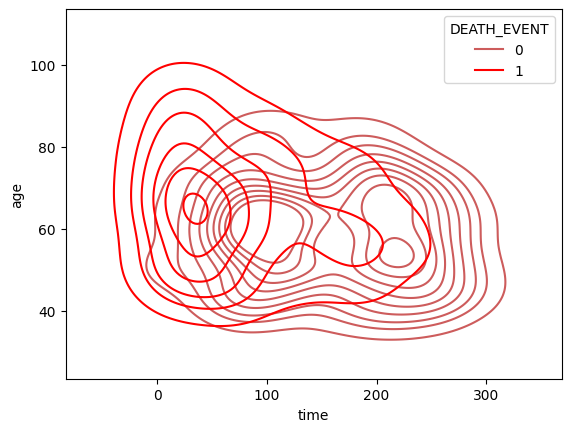

In [10]:
# Plotting "Kernel Density Estimation (kde plot)" of time and age features -  both of which are significant ones.
sns.kdeplot(x=data_df["time"], y=data_df["age"], hue =data_df["DEATH_EVENT"], palette=cols)

<a id="title-four"></a>
<h1 style='background:#F08080; border:0; border-radius: 10px; color:black'><center>DATA PREPROCESSING</center></h1>

The code separates the independent attributes (X) and the dependent attribute (y) from the dataset, where X contains all columns except "DEATH_EVENT" and y contains only the "DEATH_EVENT" column.






In [11]:
# Defining independent and dependent attributes in training and test sets
X=data_df.drop(["DEATH_EVENT"],axis=1)
y=data_df["DEATH_EVENT"]

The code applies standard scaling to the features in X using the StandardScaler from the preprocessing module. It then converts the scaled features back to a DataFrame and provides descriptive statistics for the scaled features.






In [12]:
# Setting up a standard scaler for the features and analyzing it thereafter
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_scaled= s_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=col_names)
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


The code generates boxen plots to visualize the distribution and dispersion of the scaled features in X_scaled. Each feature is represented by a boxen plot with different colors for better differentiation, and the x-axis labels are rotated for readability.






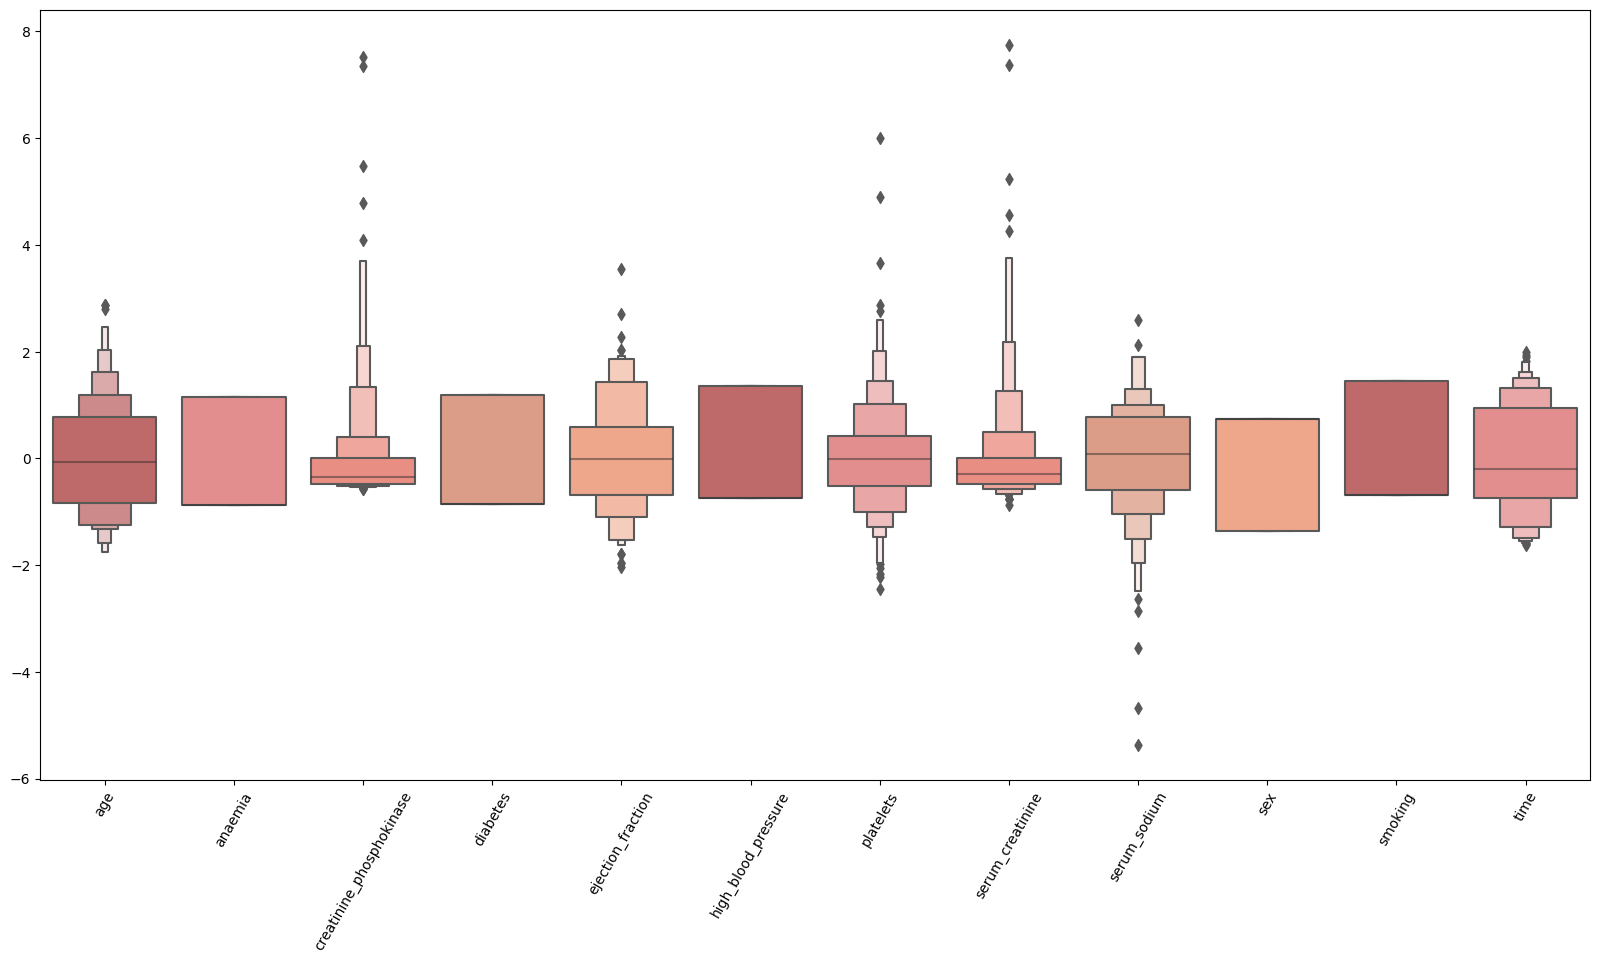

In [13]:
#Plotting the scaled features using boxen plots
colors =["#CD5C5C","#F08080","#FA8072","#E9967A","#FFA07A"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_scaled,palette = colors)
plt.xticks(rotation=60)
plt.show()

The code splits the scaled independent variables (X_scaled) and dependent variable (y) into training and test sets using a test size of 30% and a random state of 25.






In [14]:
#spliting variables into training and test sets
X_train, X_test, y_train,y_test = train_test_split(X_scaled,y,test_size=0.30,random_state=25)

<a id="title-MB"></a>
<h1 style='background:#F08080; border:0; border-radius: 10px; color:black'><center>MODEL BUILDING</center></h1>

## <a id = "title-five"></a>**<span style="color:#CD5C5C;">1. SUPPORT VECTOR MACHINE (SVM) </span>**

The code instantiates a Support Vector Machine (SVM) algorithm, fits the model using the training data (X_train and y_train), predicts the target variable (y_pred) using the test data (X_test), and calculates the accuracy score of the model on the test data.






In [15]:
# Instantiating the SVM algorithm
model1=svm.SVC()

# Fitting the model
model1.fit (X_train, y_train)

# Predicting the test variables
y_pred = model1.predict(X_test)

# Getting the score
model1.score (X_test, y_test)

0.7888888888888889

The code prints a classification report, which provides metrics such as precision, recall, and F1-score for each class, comparing the predicted labels (y_pred) with the actual labels (y_test). This helps evaluate the performance of the classification model.






In [16]:
# Printing classification report (since there was biasness in target labels)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84        60
           1       0.69      0.67      0.68        30

    accuracy                           0.79        90
   macro avg       0.76      0.76      0.76        90
weighted avg       0.79      0.79      0.79        90



The code generates a confusion matrix using confusion_matrix based on the predicted labels (y_pred) and the actual labels (y_test). It then visualizes the matrix as a heatmap using sns.heatmap, providing a graphical representation of the classification results.






<Axes: >

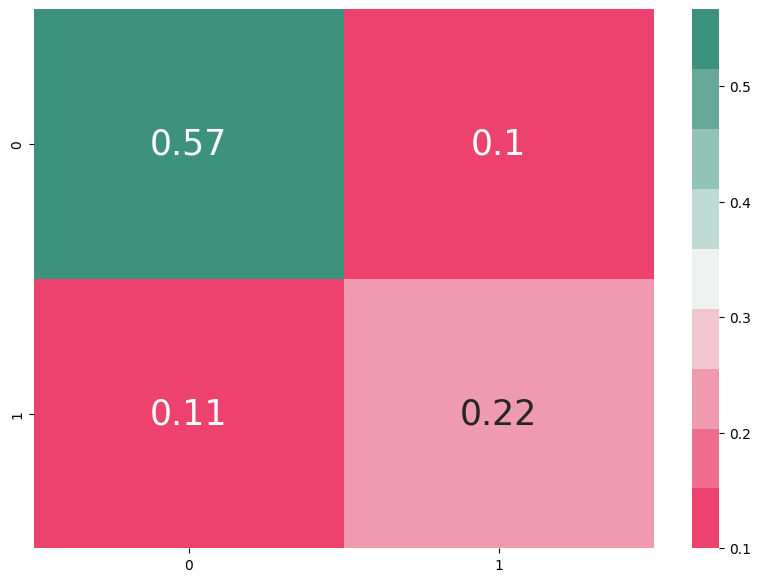

In [17]:
# Getting the confusion matrix
cmap1 = sns.diverging_palette(2, 165, s=80, l=55, n=9)
plt.subplots(figsize=(10,7))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':25})

## <a id = "title-six"></a>**<span style="color:#CD5C5C;">2. Artificial Neural Network (ANN) </span>**

The code defines and trains a neural network model using Keras. It sets up an early stopping callback to stop training if there is no improvement, initializes the model architecture with multiple layers, compiles the model with specified optimizer and loss function, and then trains the model on the training data (X_train and y_train). The training progress and performance metrics are stored in history.






In [18]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True)

# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 25, epochs = 80,callbacks=[early_stopping], validation_split=0.25)

Epoch 1/80
7/7 [==============================] - 1s 35ms/step - loss: 0.6928 - accuracy: 0.6346 - val_loss: 0.6910 - val_accuracy: 0.8302
Epoch 2/80
7/7 [==============================] - 0s 8ms/step - loss: 0.6920 - accuracy: 0.6346 - val_loss: 0.6890 - val_accuracy: 0.8302
Epoch 3/80
7/7 [==============================] - 0s 9ms/step - loss: 0.6912 - accuracy: 0.6346 - val_loss: 0.6869 - val_accuracy: 0.8302
Epoch 4/80
7/7 [==============================] - 0s 6ms/step - loss: 0.6904 - accuracy: 0.6346 - val_loss: 0.6848 - val_accuracy: 0.8302
Epoch 5/80
7/7 [==============================] - 0s 28ms/step - loss: 0.6893 - accuracy: 0.6346 - val_loss: 0.6825 - val_accuracy: 0.8302
Epoch 6/80
7/7 [==============================] - 0s 31ms/step - loss: 0.6885 - accuracy: 0.6346 - val_loss: 0.6798 - val_accuracy: 0.8302
Epoch 7/80
7/7 [==============================] - 0s 26ms/step - loss: 0.6871 - accuracy: 0.6346 - val_loss: 0.6774 - val_accuracy: 0.8302
Epoch 8/80
7/7 [==============

The code calculates the average validation accuracy from the training history and prints it as a percentage.






In [19]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy is', val_accuracy*100))


val_accuracy is: 85.95%


The code plots the training and validation loss over epochs using different colors for each line. It also adds a title, labels to the axes, and a legend for clarity before displaying the plot.






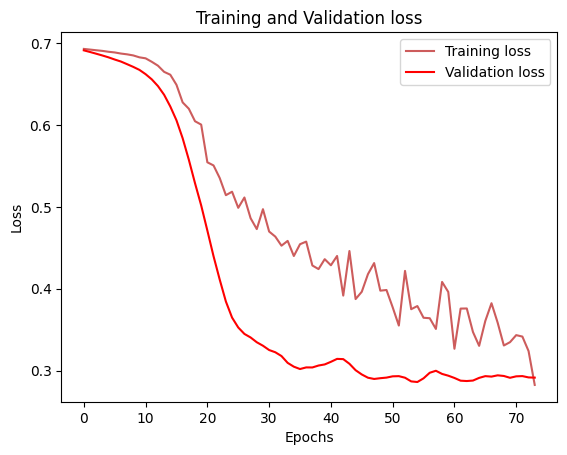

In [20]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#FF0000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

The code plots the training and validation accuracy over epochs using different colors for each line. It also adds a title, labels to the axes, and a legend for clarity before displaying the plot.






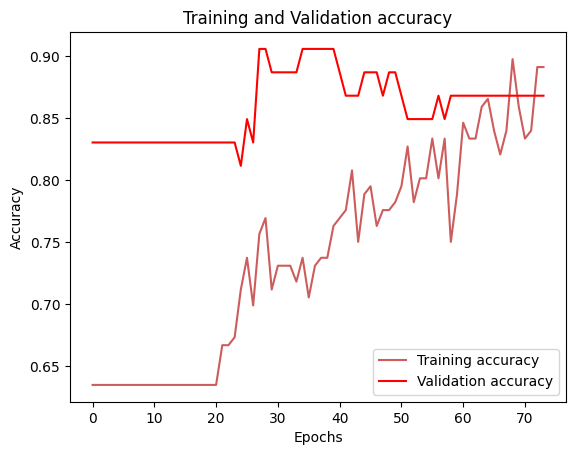

In [21]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],"#FF0000", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The code predicts the test set results using the trained model and applies a threshold of 0.4 to convert the predictions into binary values. The np.set_printoptions() function is used to set the printing options for NumPy arrays.






In [ ]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.4)
np.set_printoptions()


3/3 [==============================] - 1s 8ms/step


The code calculates the confusion matrix using the predicted values (y_pred) and the true values (y_test). It then creates a heatmap visualization of the normalized confusion matrix using Seaborn, with annotations displaying the values within the heatmap.






<Axes: >

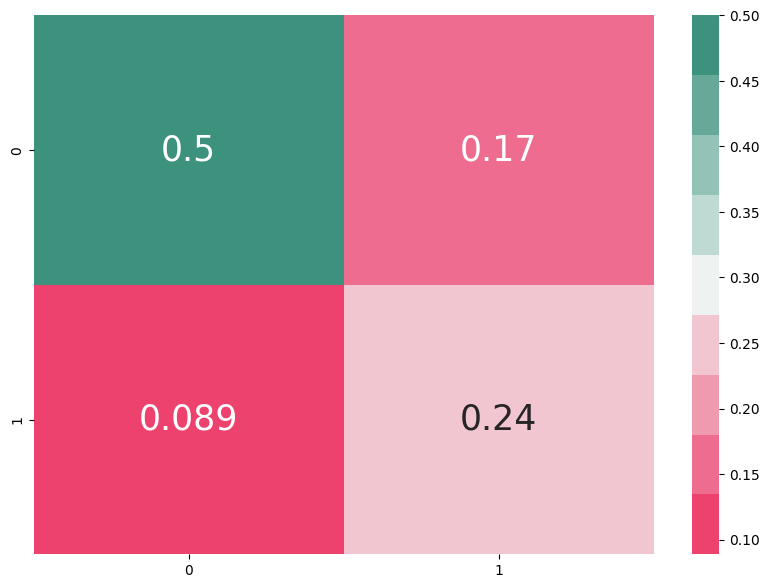

In [ ]:
# Getting the confusion matrix
cmap1 = sns.diverging_palette(2, 165, s=80, l=55, n=9)
plt.subplots(figsize=(10,7))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':25})

The code prints a classification report that includes metrics such as precision, recall, F1-score, and support for each class, comparing the predicted values (y_pred) with the true values (y_test).






In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.75      0.80        60
           1       0.59      0.73      0.66        30

    accuracy                           0.74        90
   macro avg       0.72      0.74      0.73        90
weighted avg       0.76      0.74      0.75        90

